In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
%matplotlib inline

In [2]:
# Loading the CSV files
train_df = pd.read_csv("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/training_set_pixel_size_and_HC.csv")

In [3]:
# Inspecting the training dataframe
train_df.head()

,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81


In [4]:
# Have a size of 999 but filename seems to be only till 805 
# images may repeat thus, check for unique elements
print("Total iamge file:", train_df.shape[0])
print("Total unique image files:", train_df['filename'].value_counts().shape[0])

Total iamge file: 999
Total unique image files: 999


In [5]:
# So filenames do not repeat 
# Lets check some random 10 filenames of the data
start = np.random.randint(0, train_df.shape[0]-10)
print(train_df['filename'].values[start:start+10])

['778_HC.png' '779_2HC.png' '779_HC.png' '780_2HC.png' '780_HC.png'
 '781_HC.png' '782_HC.png' '783_2HC.png' '783_3HC.png' '783_4HC.png']


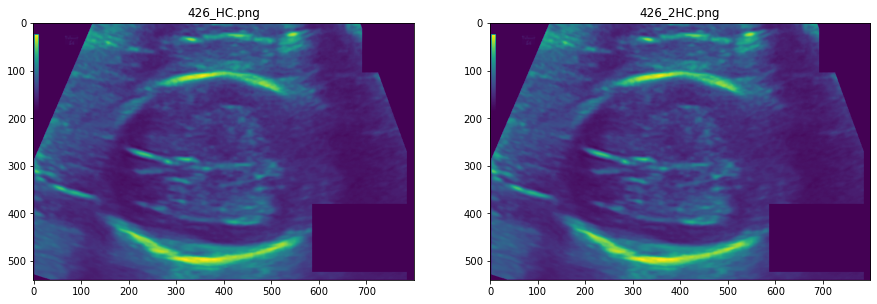

In [6]:
# So the image names are like 426_HC and 426_2HC
# Let's see those images
img1 = plt.imread("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/training_set/426_HC.png")
img2 = plt.imread("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/training_set/426_2HC.png")
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.title("426_HC.png")
plt.imshow(img1)
plt.subplot(1,2,2)
plt.title("426_2HC.png")
plt.imshow(img1)

In [7]:
# Seems same image but with augmentation
# Let's just save the filnames in a list
X_train_images = train_df['filename'].values

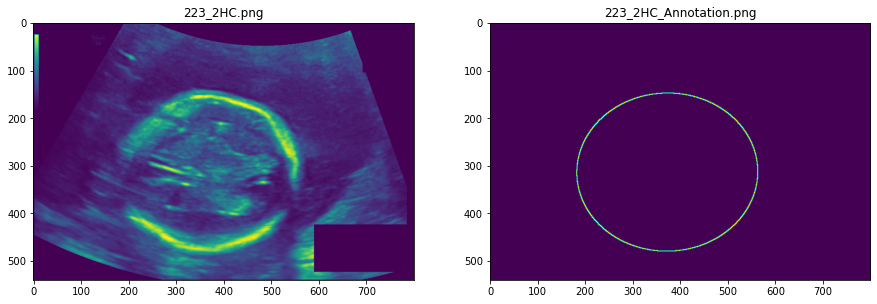

In [8]:
# Now for the ground truths of the training images 
# Ground truth are stored in the same directory but with names <filename>_Annotations.png
# Lets open a random image and it's ground truth
name = X_train_images[np.random.randint(0, X_train_images.shape[0]-1)]
im1 = plt.imread("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/training_set/"+name)
im2 = plt.imread("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/training_set/"+name[0:len(name)-4]+"_Annotation.png")
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.title(name)
plt.imshow(im1)
plt.subplot(1,2,2)
plt.title(name[0:len(name)-4]+"_Annotation.png")
plt.imshow(im2)

In [9]:
# So the ground truth is just an ellipse
# To generate_masks using OpenCV contour finding and ellipse fiiting (Hough Transform)
name = X_train_images[0][0:len(X_train_images[0])-4]
image =  cv2.imread("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/training_set/"+name+"_Annotation.png",0)
im = image.copy()
im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    ellipse = cv2.fitEllipse(c)
    cv2.ellipse(im, ellipse, (255,255,255), -1)


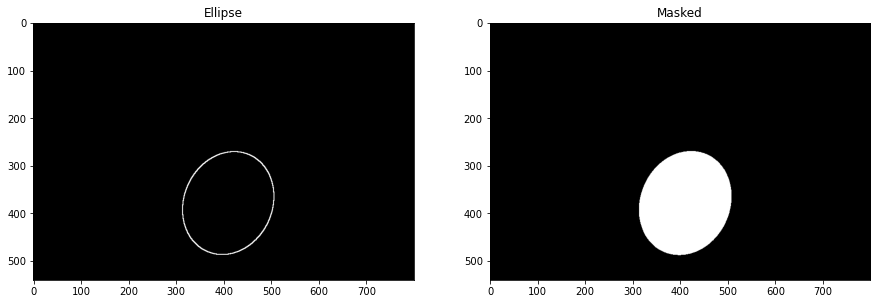

In [10]:
# Lets see the result of mask function
im1 = plt.imread("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/training_set/"+name+"_Annotation.png")
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.title("Ellipse")
plt.imshow(im1, cmap='gray')
plt.subplot(1,2,2)
plt.title("Masked")
plt.imshow(im)

In [11]:
# Lets do it for all images and save
def mask(name):
    image =  cv2.imread("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/training_set/"+name+"_Annotation.png",0)
    im = image.copy()
    im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)

    contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        ellipse = cv2.fitEllipse(c)
        cv2.ellipse(im, ellipse, (255,255,255), -1)

    cv2.imwrite("C:/Users/pranjal/Desktop/Project/Deep Learning/Fetal head circumference/Masks/"+name+"_Annotation.png", im)

In [12]:
# Used once and the Masks are stored in the directory
""""
for file in X_train_images:
    name = file[0:len(file)-4]
    mask(name)
"""""

In [13]:
## Go to next notebook